# Worksheet 4 Unconstrained optimization 
## J.Morlier March 2020


# On the descent direction 

In [34]:
using LinearAlgebra, SparseArrays, SuiteSparse, Random
using SymPy
using Plots; pyplot()
import Base.print_matrix




In [35]:
versioninfo()

Julia Version 1.3.1
Commit 2d5741174c (2019-12-30 21:36 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin18.6.0)
  CPU: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, skylake)


In [36]:
entries = @syms x1 x2  real=true

(x1, x2)

Consider the function f : R2 → R given by J(x) = x1^3+x^2 +2*x2. Give some descent directions for J at the point [1,1]⊤. Is there any descent direction at the point [0, −1]⊤ ? Justify the answer.

In [132]:
J=x1^3 +x2^2 +2*x2

  3     2       
x₁  + x₂  + 2⋅x₂

In [133]:
dJdx1=diff(J,x1)  ;

dJdx2=diff(J,x2) ;

dJ=[dJdx1; dJdx2]

2-element Array{Sym,1}:
   3*x1^2
 2*x2 + 2

substitute with Point (1,1);

In [134]:
A=[dJdx1(1) ; dJdx2(1)]

2-element Array{Sym,1}:
 3
 4

Create vector of possible descent directions

In [135]:
entries = @syms d1 d2  real=true

(d1, d2)

In [136]:
dir=A'*[d1; d2]

3⋅d₁ + 4⋅d₂

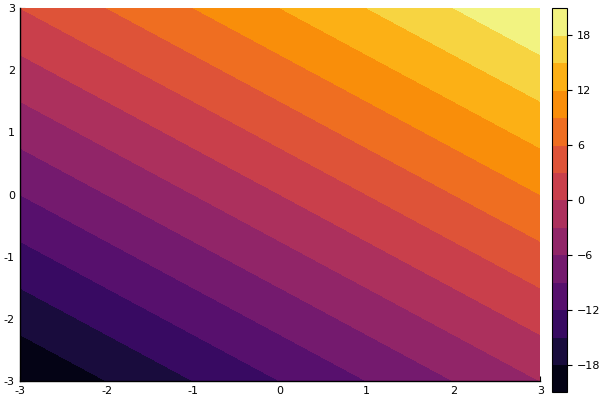

In [137]:
x=range(-3,stop=3,length=20)
y=range(-3,stop=3,length=20)
f(x,y) = 3*x+4*y
plot(x,y,f,st=:contourf,camera=(0,0))

It's up to you to choose one possible solution	such that 3d1 + 4d2 < 0				

substitute with (0,-1). Something wrong?

In [142]:
dJdx1

    2
3⋅x₁ 

In [143]:
dJdx2


2⋅x₂ + 2

In [144]:
A=[dJdx1(0) ; dJdx2(-1)]

2-element Array{Sym,1}:
 0
 0

In [145]:

dir=A'*[d1; d2]

0

thus one cannot find a descent direction at the point.

# On the optimal step-size 


Compute the optimal step-size at [5, 1]⊤ following the direction d = −∇f (5, 1). 

In [146]:
J=0.5*x1^2 + 4.5*x2^2

      2         2
0.5⋅x₁  + 4.5⋅x₂ 

In [147]:
dJdx1=diff(J,x1)  ;

dJdx2=diff(J,x2) ;

dJ=[dJdx1; dJdx2]

2-element Array{Sym,1}:
 1.0*x1
 9.0*x2

In [148]:
entries = @syms alpha  real=true

(alpha,)

In [149]:
d=-dJ

2-element Array{Sym,1}:
 -1.0*x1
 -9.0*x2

In [150]:
x=[x1;x2]

2-element Array{Sym,1}:
 x1
 x2

In [152]:
Jnew=(0.5*newx[1]^2 + 4.5*newx[2]^2)


                    2                                       2
0.5⋅(-1.0⋅α⋅x₁ + x₁)  + 364.5⋅(-α⋅x₂ + 0.111111111111111⋅x₂) 

In [153]:
Jnew=factor(Jnew)

      ⎛                     2   2        2   2                           2    
364.5⋅⎝0.00137174211248285⋅α ⋅x₁  + 1.0⋅α ⋅x₂  - 0.00274348422496571⋅α⋅x₁  - 0

                     2                         2                        2⎞
.222222222222222⋅α⋅x₂  + 0.00137174211248285⋅x₁  + 0.0123456790123457⋅x₂ ⎠

In [154]:
dJda=(diff(Jnew,alpha))

        2             2         2          2
1.0⋅α⋅x₁  + 729.0⋅α⋅x₂  - 1.0⋅x₁  - 81.0⋅x₂ 

substitute with [5,1]

In [155]:
dJda(x1=>5, x2=>1)

754.0⋅α - 106.0

In [156]:
alpha_star=106/754

0.14058355437665782

# On the Newton method 

For a given starting point x(0) = [x1, x2]⊤, compute the Newton direction at this point. 

In [159]:
function gradient2(J,x1,x2)

dJdx1=diff(J,x1)  ;

dJdx2=diff(J,x2) ;
dJ=[dJdx1; dJdx2]
return dJ
end

gradient2 (generic function with 1 method)

In [160]:
function hessian2(dJ,x1,x2)
    
Hdx11=diff(dJ[1],x1);
Hdx12=diff(dJ[1],x2);

Hdx21=diff(dJ[2],x1);

Hdx22=diff(dJ[2],x2);
H=[Hdx11 Hdx12; Hdx21 Hdx22]
return H
end

hessian2 (generic function with 1 method)

In [161]:
J=0.5*x1^2 + 4.5*x2^2

      2         2
0.5⋅x₁  + 4.5⋅x₂ 

In [162]:
dJ=gradient2(J,x1,x2)

2-element Array{Sym,1}:
 1.0*x1
 9.0*x2

In [163]:
H=hessian2(dJ,x1,x2)

2×2 Array{Sym,2}:
 1.00000000000000                 0
                0  9.00000000000000

give newton's direction

In [164]:
d_0=-inv(H)*dJ

2-element Array{Sym,1}:
 -1.0*x1
 -1.0*x2

it seems always negative? right ?  is a descent direction for J at the point x(0) 

In [165]:
xnew=x+d_0

2-element Array{Sym,1}:
 0
 0

Hence, one gets in one iteration the optimal solution independently of the starting point (this is the case for all quadratic minimization problems) 

# Same question with a new function
For a given starting point x(0) = [x1, x2]⊤, compute the Newton direction at this point. 

In [166]:
J=x1^4 + 2*x2^2

  4       2
x₁  + 2⋅x₂ 

In [167]:
dJ=gradient2(J,x1,x2)


2-element Array{Sym,1}:
 4*x1^3
   4*x2

In [168]:
H=hessian2(dJ,x1,x2)

2×2 Array{Sym,2}:
 12*x1^2  0
       0  4

In [169]:
d_0=-inv(H)*dJ

2-element Array{Sym,1}:
 -x1/3
   -x2

it seems always negative? right ?  is a descent direction for J at the point x(0) 

In [170]:
xnew=x+d_0

2-element Array{Sym,1}:
 2*x1/3
      0

One iteration of the Newton method is not enough to converge to the optimal solution. 